# 1. Data Import (Using API Code)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install kaggle

In [ ]:
outfile = open("kaggle.json","w")
outfile.write('{"username":"amranhussain75","key":"7fcfaee508438828c78f66160f0b87a8"}')
outfile.close()

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls /root/.kaggle

kaggle.json


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_file("amranhussain75/data-analysis-project","DataAnalysis Project.xlsx")

Dataset URL: https://www.kaggle.com/datasets/amranhussain75/data-analysis-project


True

In [ ]:
!ls

DataAnalysis%20Project.xlsx  sample_data


# 2. Data Clean-Up



In [ ]:
# Load the dataset
data = pd.read_excel('DataAnalysis%20Project.xlsx', sheet_name='Clean Data')



In [ ]:
# to replace pg from the age column as part of clean up
data.replace("pg", 8, inplace=True)
data.to_csv('modified_file.csv', index=False)

# This is to correct the erroneous run times
column_A_dtype = data['runtime'].dtype
data['runtime'].replace({"4,393 min":"53 min","1,164 min":"50 min","572 min":"56 min","386 min":"36 min","370 min":"95 min","356 min":"44 min"}, inplace=True)
data
#Data cleaning is complete

,Serial Number,Name,certificate (age app),runtime,genre,rating,votes
0,1,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,1327188
1,2,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,314321
2,3,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,319342
3,4,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,636319
4,5,Money Heist,15,60 min,"Action, Crime, Drama",8.2,529086
...,...,...,...,...,...,...,...
75,76,F Is for Family,15,30 min,"Animation, Comedy, Drama",8.0,41074
76,77,The Ranch,15,30 min,"Comedy, Drama, Western",7.5,42401
77,78,American Vandal,15,34 min,"Comedy, Crime, Drama",8.1,32985
78,79,Dead to Me,15,30 min,"Comedy, Crime, Drama",7.9,99440


# 3. Statistical Analysis



In [ ]:
# Step 3: Statistical Analysis
# Count(s)
count = data.count()

# Display results
print("Count(s):")
print(count)

Count(s):
Serial Number            80
Name                     80
certificate (age app)    80
runtime                  80
genre                    80
rating                   80
votes                    80
dtype: int64


In [ ]:
# Min, max, range
# Converting runtime to float by removing commas and omitting "min"
if data['runtime'].dtype != 'object':
    data['runtime'] = data['runtime'].astype(str)

data['runtime'] = data['runtime'].str.replace(',', '').str.replace(' min', '').astype(float)

# Converting 'certificate (age app)' to numeric by removing any non-numeric characters
data['certificate (age app)'] = pd.to_numeric(data['certificate (age app)'], errors='coerce')

# Selecting numeric columns
numcolumns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculating Min, Max, and Range for each numeric column
min = data[numcolumns].min()
max = data[numcolumns].max()
range = max - min

# Print results
for col in numcolumns:
    print(f"{col}:")
    print(f"  Min: {min[col]}")
    print(f"  Max: {max[col]}")
    print(f"  Range: {range[col]}")


Serial Number:
  Min: 1.0
  Max: 80.0
  Range: 79.0
certificate (age app):
  Min: 12.0
  Max: 18.0
  Range: 6.0
runtime:
  Min: 15.0
  Max: 95.0
  Range: 80.0
rating:
  Min: 5.9
  Max: 8.8
  Range: 2.9000000000000004
votes:
  Min: 5910.0
  Max: 1327188.0
  Range: 1321278.0


In [ ]:
# Standard deviation
# Select only numeric columns
numeric_data = data.select_dtypes(include=np.number)

std_dev = numeric_data.std()
print("\nStandard deviation:")
print(std_dev)


Standard deviation:
Serial Number                23.237900
certificate (age app)         1.564734
runtime                      14.822873
rating                        0.712350
votes                    197426.097298
dtype: float64


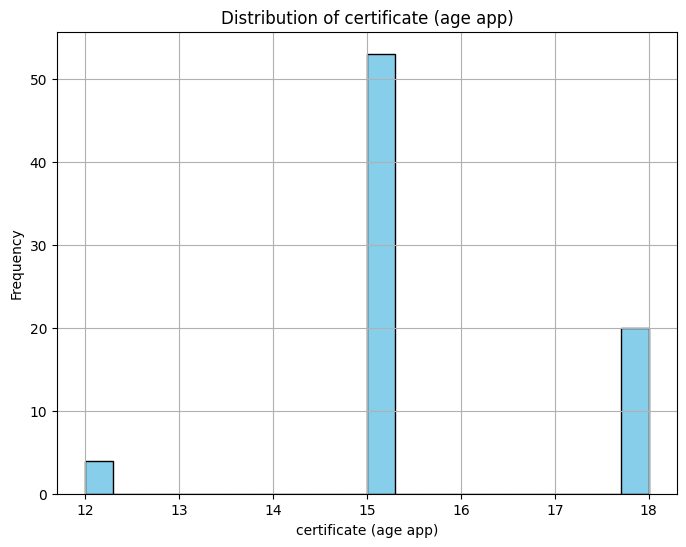

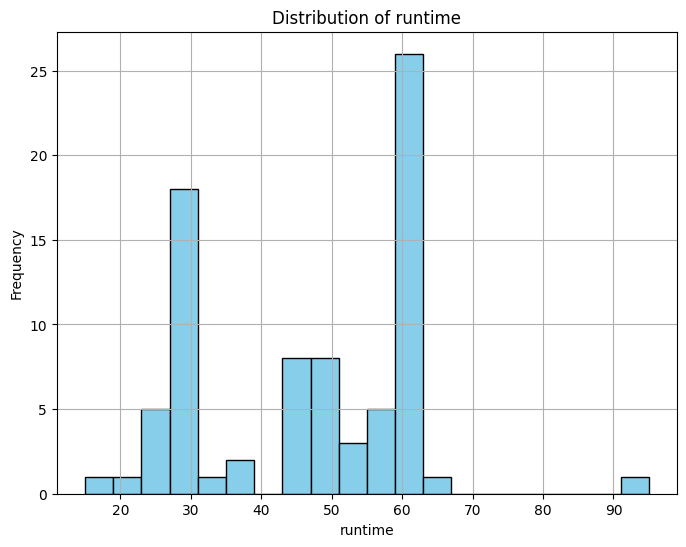

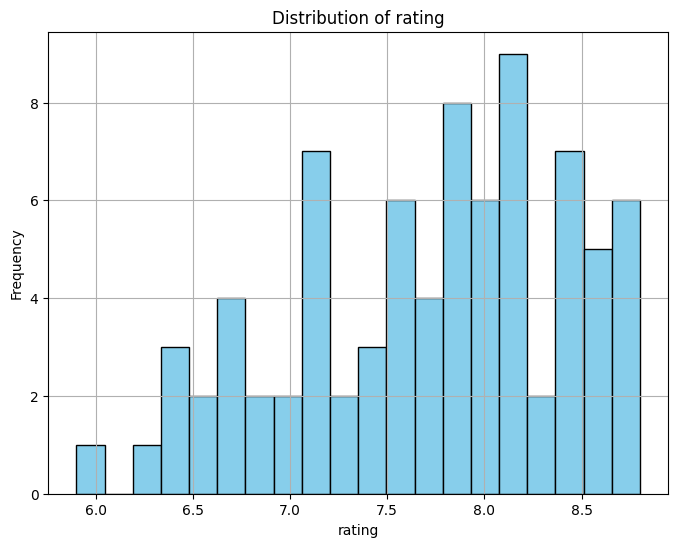

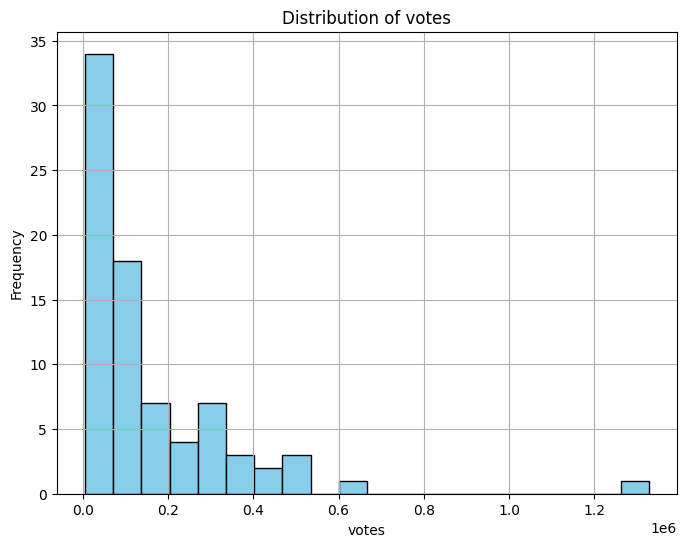

In [ ]:
# Distribution of the numeric columns
# Removing 'Serial Number' column
data.drop('Serial Number', axis=1, inplace=True)

# Converting runtime to float by removing commas and omitting "min"
if data['runtime'].dtype != 'object':
    data['runtime'] = data['runtime'].astype(str)

data['runtime'] = data['runtime'].str.replace(',', '').str.replace(' min', '').astype(float)

# Converting 'certificate (age app)' to numeric by removing any non-numeric characters
data['certificate (age app)'] = pd.to_numeric(data['certificate (age app)'], errors='coerce')

# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column including runtime and certificate (age app)
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Outliers

In [ ]:
# Outliers using IQR
outliers = pd.DataFrame()
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers = pd.concat([outliers, col_outliers], axis=0)

print("\nOutliers:")
print(outliers)


Outliers:
               Name  certificate (age app)  runtime                   genre  \
0   Stranger Things                   15.0     60.0  Drama, Fantasy, Horror   
3      Black Mirror                   18.0     60.0  Drama, Mystery, Sci-Fi   
4       Money Heist                   15.0     60.0    Action, Crime, Drama   
10   House of Cards                   18.0     50.0                   Drama   

    rating    votes  
0      8.7  1327188  
3      8.7   636319  
4      8.2   529086  
10     8.6   529463  


### Correlation

In [ ]:
# Correlation
correlation_matrix = numeric_data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                       Serial Number  certificate (age app)   runtime  \
Serial Number               1.000000              -0.080063 -0.372468   
certificate (age app)      -0.080063               1.000000 -0.025826   
runtime                    -0.372468              -0.025826  1.000000   
rating                     -0.275975               0.151488  0.081518   
votes                      -0.616414               0.184237  0.300700   

                         rating     votes  
Serial Number         -0.275975 -0.616414  
certificate (age app)  0.151488  0.184237  
runtime                0.081518  0.300700  
rating                 1.000000  0.547499  
votes                  0.547499  1.000000  


**What are some interesting statistics about your data?**


**Average Rating**

The average rating across all TV shows in the dataset is approximately 7.72. This gives us an insight into the overall quality or reception of the TV shows included in the dataset. TV shows with ratings higher than the average can be considered more positively received by audiences.


**Most Common Genre**

The most common genre among the TV shows in the dataset is "Comedy, Drama". This indicates that a significant portion of the TV shows in the dataset belong to this genre combination. This insight can be valuable for content creators and streaming platforms to understand the preferences of viewers and potentially guide their content creation or recommendation strategies.

In [ ]:
# Calculating the average rating and most common genre
average_rating = data['rating'].mean()
most_common_genre = data['genre'].mode()[0]

# Show results
print("Average rating:", average_rating)
print("Most common genre:", most_common_genre)

Average rating: 7.720000000000001
Most common genre: Comedy, Drama


**Step 4: Visualization**



<ipython-input-27-b957dab6dcb3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='certificate (age app)', data=data, palette='Set2')


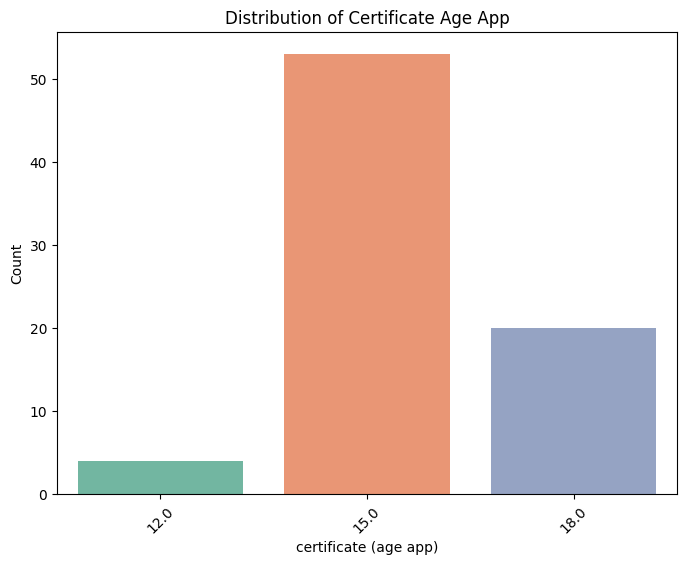

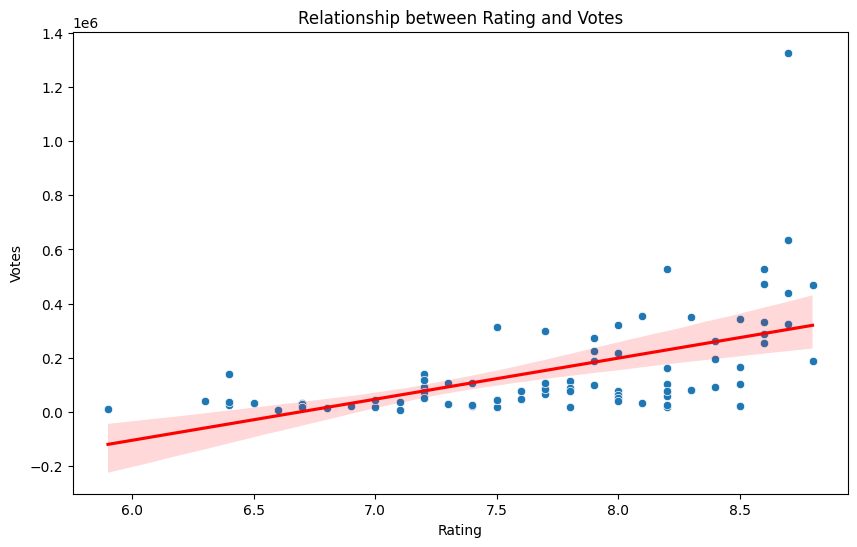

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph 1: Distribution of Certificate Age App
plt.figure(figsize=(8, 6))
sns.countplot(x='certificate (age app)', data=data, palette='Set2')
plt.title('Distribution of Certificate Age App')
plt.xlabel('certificate (age app)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot with regression line: Relationship between Rating and Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='votes', data=data)
sns.regplot(x='rating', y='votes', data=data, scatter=False, color='red')  # Add regression line
plt.title('Relationship between Rating and Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()




# 5. Exporting


In [ ]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('cleaned_data.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute SQL query to select all rows from the 'cleaned_table'
cursor.execute("SELECT * FROM cleaned_table")

# Fetch all rows from the result set
rows = cursor.fetchall()

# Print the data
for row in rows:
    print(row)

# Close cursor and connection
cursor.close()
conn.close()


('Stranger Things', 15.0, 60.0, 'Drama, Fantasy, Horror', 8.7, 1327188)
('13 Reasons Why', 18.0, 60.0, 'Drama, Mystery, Thriller', 7.5, 314321)
('Orange Is the New Black', 18.0, 59.0, 'Comedy, Crime, Drama', 8.0, 319342)
('Black Mirror', 18.0, 60.0, 'Drama, Mystery, Sci-Fi', 8.7, 636319)
('Money Heist', 15.0, 60.0, 'Action, Crime, Drama', 8.2, 529086)
('Lucifer', 15.0, 53.0, 'Crime, Drama, Fantasy', 8.1, 354155)
('Narcos', 15.0, 50.0, 'Biography, Crime, Drama', 8.8, 467909)
('Daredevil', 15.0, 60.0, 'Action, Crime, Drama', 8.6, 472940)
('Sense8', 15.0, 60.0, 'Drama, Mystery, Sci-Fi', 8.2, 162528)
('Jessica Jones', 15.0, 56.0, 'Action, Crime, Drama', 7.9, 226187)
('House of Cards', 18.0, 50.0, 'Drama', 8.6, 529463)
('The End of the F***ing World', 15.0, 25.0, 'Adventure, Comedy, Crime', 8.0, 218483)
('Dark', 15.0, 60.0, 'Crime, Drama, Mystery', 8.7, 440321)
('Sex Education', 18.0, 60.0, 'Comedy, Drama, Romance', 8.3, 348817)
('Elite', 15.0, 60.0, 'Crime, Drama, Thriller', 7.2, 90237)
('